# Titanic project

#### I will try to predict survivors on Titanic. It is based on dataset from Kaggle https://www.kaggle.com/c/titanic. But I will use only train set, because I don't know correct predictions for test set.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv('Titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exploratory Data Analysis

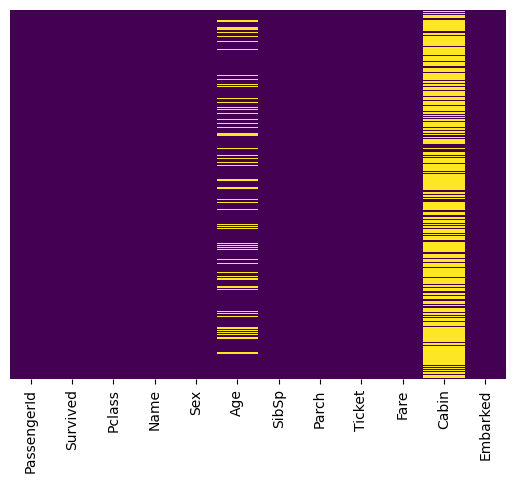

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

We should replace null cells from Age column and remove Cabin ( too many null cells).

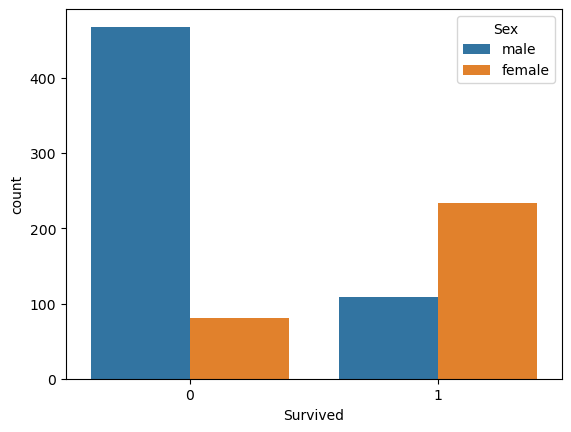

In [13]:
sns.countplot(x='Survived',hue='Sex',data=df)
plt.show()

More woman than man survived. There is a huge difference between male and female that not survived.

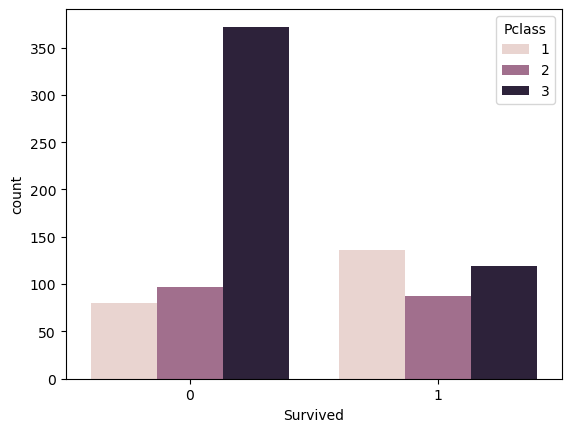

In [15]:
sns.countplot(x='Survived',hue='Pclass',data=df)
plt.show()

The most people didn't survive who had the lowest class.

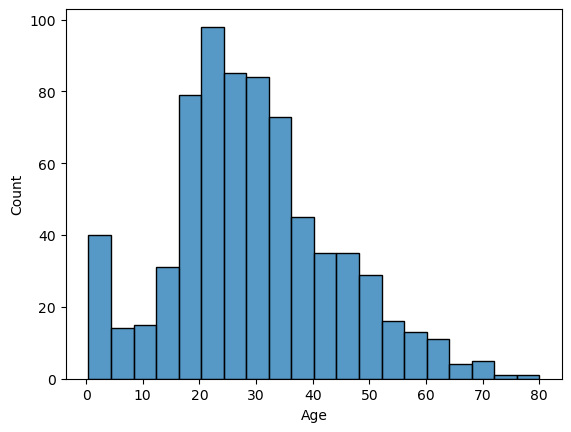

In [17]:
sns.histplot(df['Age'].dropna())
plt.show()

In [19]:
df['Age'].skew()

0.38910778230082704

Skewed right - most of passengers were between 20 and 40. There were also many children on board. 

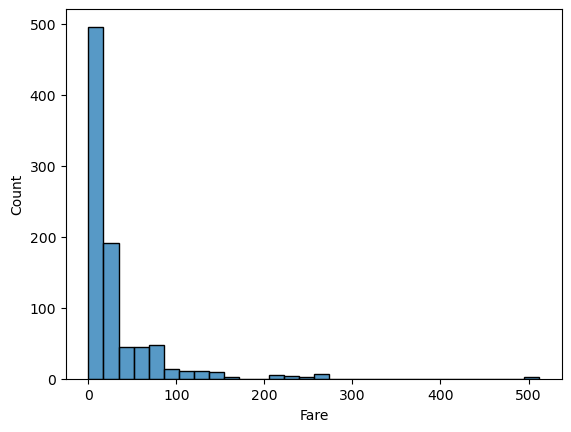

In [21]:
sns.histplot(df['Fare'],bins=30)
plt.show()

In [23]:
df['Fare'].skew()

4.787316519674893

Extreme skewed right. Most tickets had low prices. There were few very expensive tickets, which cause a long tail of the distribution.

## Replace null values in the Age column

In [25]:
def replacing_null(df):
    pclass_grouped=df.groupby('Pclass')['Age'].transform('median')
    df['Age']=df['Age'].fillna(pclass_grouped)
    return df

In [27]:
df=replacing_null(df)
df=df.drop(['Cabin','PassengerId','Ticket','Name'],axis=1)

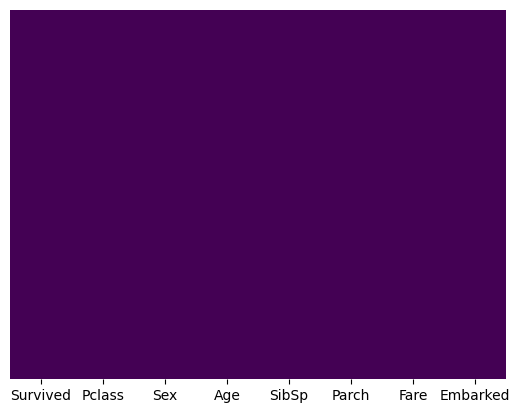

In [29]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

Now, dataset doesn't have any empty cells.

## Another prep data

In [31]:
df['family']=df['SibSp']+df['Parch']+1

In [33]:
df=pd.get_dummies(df,columns=['Sex'],drop_first=True)
df=pd.get_dummies(df,columns=['Embarked'],drop_first=True)

In [35]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,family,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,2,True,False,True
1,1,1,38.0,1,0,71.2833,2,False,False,False
2,1,3,26.0,0,0,7.9250,1,False,False,True
3,1,1,35.0,1,0,53.1000,2,False,False,True
4,0,3,35.0,0,0,8.0500,1,True,False,True


## Split the dataset into train/test

In [37]:
from sklearn.model_selection import train_test_split

In [39]:
X=df.drop(columns=['Survived'],axis=1)
y=df['Survived']

In [41]:
X_train,X_temp,y_train,y_temp=train_test_split(X,y,train_size=0.7,stratify=y,random_state=2025)
X_val,X_test,y_val,y_test=train_test_split(X_temp,y_temp,test_size=0.5,stratify=y_temp,random_state=2025)

I used "stratify" because it allows me to have steadily balanced datasets, you can see it below.

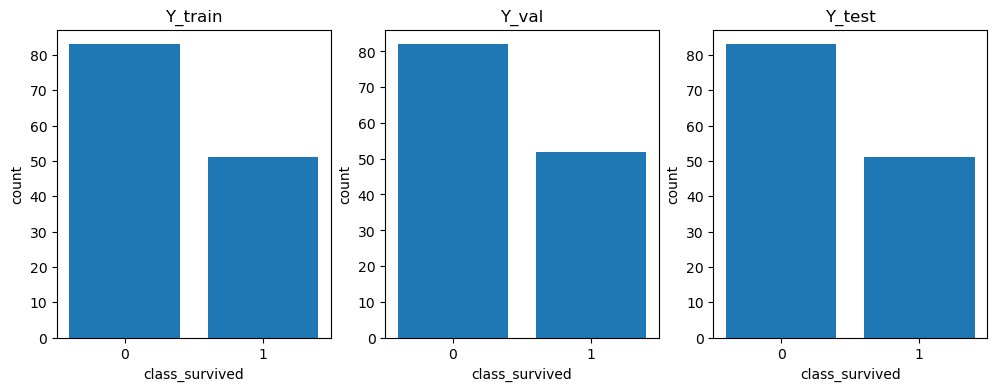

In [43]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.bar(y_test.value_counts().index,y_train.value_counts())
plt.title('Y_train')
plt.xticks([0,1])
plt.ylabel('count')
plt.xlabel('class_survived')

plt.subplot(1,3,2)
plt.bar(y_val.value_counts().index,y_val.value_counts())
plt.title('Y_val')
plt.xticks([0,1])
plt.ylabel('count')
plt.xlabel('class_survived')

plt.subplot(1,3,3)
plt.bar(y_test.value_counts().index,y_test.value_counts())
plt.title('Y_test')
plt.xticks([0,1])
plt.ylabel('count')
plt.xlabel('class_survived')

plt.show()

## Basics models

I will build log,random forest and xgb model, then I choose the best one

#### Log model

In [45]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(max_iter=1000,random_state=2025)
log_model.fit(X_train,y_train)
log_model_pred=log_model.predict(X_val)

#### Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=2025)
rfc.fit(X_train,y_train)
rfc_pred=rfc.predict(X_val)

#### XGBoost

In [49]:
from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=2025)
xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_val)

In [51]:
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report

#### Log model - result

In [53]:
auc=roc_auc_score(y_val,log_model.predict_proba(X_val)[:,1])

print(f'Auc:{auc:.3f}')
print(confusion_matrix(y_val,log_model_pred))
print(classification_report(y_val,log_model_pred))

Auc:0.841
[[69 13]
 [16 36]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        82
           1       0.73      0.69      0.71        52

    accuracy                           0.78       134
   macro avg       0.77      0.77      0.77       134
weighted avg       0.78      0.78      0.78       134



#### Random Forest - result

In [55]:
auc=roc_auc_score(y_val,rfc.predict_proba(X_val)[:,1])

print(f'Auc:{auc:.3f}')
print(confusion_matrix(y_val,rfc_pred))
print(classification_report(y_val,rfc_pred))

Auc:0.875
[[72 10]
 [12 40]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        82
           1       0.80      0.77      0.78        52

    accuracy                           0.84       134
   macro avg       0.83      0.82      0.83       134
weighted avg       0.83      0.84      0.84       134



#### XGB - result

In [57]:
auc=roc_auc_score(y_val,xgb.predict_proba(X_val)[:,1])

print(f'Auc:{auc:.3f}')
print(confusion_matrix(y_val,xgb_pred))
print(classification_report(y_val,xgb_pred))

Auc:0.852
[[73  9]
 [14 38]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        82
           1       0.81      0.73      0.77        52

    accuracy                           0.83       134
   macro avg       0.82      0.81      0.82       134
weighted avg       0.83      0.83      0.83       134



Random Forest has the best result, even so I will try to improve it by hiperparameters.

## Adding more information to dataset
I added extra information from Name column like Mrs., Mr. etc. I might help to create better model.

In [59]:
data=pd.read_csv('titanic_train.csv')
df['title']=data['Name'].str.extract(r'([A-Za-z]+)\.')

In [61]:
df['title'].value_counts()

title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [63]:
df['title']=df['title'].replace(['Mlle','Ms'],'Miss')
df['title']=df['title'].replace('Mme','Mrs')
df['title']=df['title'].replace(['Capt','Col','Rev','Major'],'Service')
df['title']=df['title'].replace(['Don','Lady','Sir','Countess','Jonkheer'],'High status')

In [65]:
df['title'].value_counts()

title
Mr             517
Miss           185
Mrs            126
Master          40
Service         11
Dr               7
High status      5
Name: count, dtype: int64

I combined a few titles to get larger groups, so model will generalize better.

In [67]:
df=pd.get_dummies(df,columns=['title'],drop_first=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,family,Sex_male,Embarked_Q,Embarked_S,title_High status,title_Master,title_Miss,title_Mr,title_Mrs,title_Service
0,0,3,22.0,1,0,7.2500,2,True,False,True,False,False,False,True,False,False
1,1,1,38.0,1,0,71.2833,2,False,False,False,False,False,False,False,True,False
2,1,3,26.0,0,0,7.9250,1,False,False,True,False,False,True,False,False,False
3,1,1,35.0,1,0,53.1000,2,False,False,True,False,False,False,False,True,False
4,0,3,35.0,0,0,8.0500,1,True,False,True,False,False,False,True,False,False


In [69]:
X=df.drop(columns=['Survived'],axis=1)
y=df['Survived']

X_train,X_temp,y_train,y_temp=train_test_split(X,y,train_size=0.7,stratify=y,random_state=2025)
X_val,X_test,y_val,y_test=train_test_split(X_temp,y_temp,test_size=0.5,stratify=y_temp,random_state=2025)

## Bayesian opitmization

In [71]:
import optuna
from sklearn.model_selection import cross_val_score

In [73]:
def objective(trial):
    params={
        'n_estimators':trial.suggest_int('n_estimators',10,500),
        'min_samples_leaf':trial.suggest_int('min_samples_leaf',1,20),
        'min_samples_split':trial.suggest_int('min_samples_split',2,50),
        'max_depth':trial.suggest_int('max_depth',1,30),
        'class_weight':trial.suggest_categorical('class_weight',[None,'balanced'])
    }
    model=RandomForestClassifier(**params,random_state=2025)
    score=cross_val_score(model,X_train,y_train,cv=5,scoring='roc_auc',n_jobs=-1).mean()
    return score

In [75]:
study=optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=100)

best_params=study.best_params
print('Best params',best_params)
print(f'Score {study.best_value:.3f}')

[I 2025-03-01 18:41:13,341] A new study created in memory with name: no-name-e07ee4b4-a529-457b-833d-6c54ee50e75a
[I 2025-03-01 18:41:15,418] Trial 0 finished with value: 0.8712221574851056 and parameters: {'n_estimators': 398, 'min_samples_leaf': 1, 'min_samples_split': 25, 'max_depth': 30, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.8712221574851056.
[I 2025-03-01 18:41:16,991] Trial 1 finished with value: 0.8566699934071156 and parameters: {'n_estimators': 429, 'min_samples_leaf': 20, 'min_samples_split': 31, 'max_depth': 12, 'class_weight': None}. Best is trial 0 with value: 0.8712221574851056.
[I 2025-03-01 18:41:18,539] Trial 2 finished with value: 0.8670191027011436 and parameters: {'n_estimators': 411, 'min_samples_leaf': 9, 'min_samples_split': 11, 'max_depth': 23, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.8712221574851056.
[I 2025-03-01 18:41:19,529] Trial 3 finished with value: 0.8676117503017698 and parameters: {'n_estimators': 68, 'min_sampl

Best params {'n_estimators': 322, 'min_samples_leaf': 4, 'min_samples_split': 6, 'max_depth': 27, 'class_weight': None}
Score 0.877


In [77]:
final_model=RandomForestClassifier(**best_params,random_state=2025)
final_model.fit(X_train,y_train)
final_model_pred=final_model.predict(X_val)

In [79]:
auc=roc_auc_score(y_val,final_model.predict_proba(X_val)[:,1])

print(f'Auc:{auc:.3f}')
print(confusion_matrix(y_val,final_model_pred))
print(classification_report(y_val,final_model_pred))

Auc:0.874
[[75  7]
 [15 37]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        82
           1       0.84      0.71      0.77        52

    accuracy                           0.84       134
   macro avg       0.84      0.81      0.82       134
weighted avg       0.84      0.84      0.83       134



In [81]:
from sklearn.metrics import roc_curve

y_val_proba=final_model.predict_proba(X_val)[:, 1] 

fpr,tpr,thresholds=roc_curve(y_val, y_val_proba)

optimal_idx=(tpr-fpr).argmax()
optimal_threshold=thresholds[optimal_idx]

print(f'New threshold:{optimal_threshold:.2f}')

y_val_adjusted=(y_val_proba>=optimal_threshold).astype(int)

print(confusion_matrix(y_val,y_val_adjusted))
print(classification_report(y_val,y_val_adjusted))

New threshold:0.41
[[73  9]
 [12 40]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        82
           1       0.82      0.77      0.79        52

    accuracy                           0.84       134
   macro avg       0.84      0.83      0.83       134
weighted avg       0.84      0.84      0.84       134



After optimalization model is similar to basic rfc model. However the basic rfc model was built on dataset without title from the name column. I will try to build new basic model based on the final dataset. 

In [83]:
final_basic_rfc=RandomForestClassifier(random_state=2025)
final_basic_rfc.fit(X_train,y_train)
final_basic_rfc_pred=final_basic_rfc.predict(X_val)

auc=roc_auc_score(y_val,final_basic_rfc.predict_proba(X_val)[:,1])

print(f'Auc:{auc:.3f}')
print(confusion_matrix(y_val,final_basic_rfc_pred))
print(classification_report(y_val,final_basic_rfc_pred))

Auc:0.882
[[76  6]
 [13 39]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        82
           1       0.87      0.75      0.80        52

    accuracy                           0.86       134
   macro avg       0.86      0.84      0.85       134
weighted avg       0.86      0.86      0.86       134



As we can see, final basic rfc model is a little better than optimized model.

## Final testing

In [85]:
test=final_basic_rfc.predict(X_test)
test_proba=final_basic_rfc.predict_proba(X_test)[:,1]
auc_test=roc_auc_score(y_test,test_proba)

print(f'Auc:{auc:.3f}')
print(confusion_matrix(y_test,test))
print(classification_report(y_test,test))

Auc:0.882
[[71 12]
 [15 36]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        83
           1       0.75      0.71      0.73        51

    accuracy                           0.80       134
   macro avg       0.79      0.78      0.78       134
weighted avg       0.80      0.80      0.80       134

